In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [169]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [170]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [171]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378130 entries, 0 to 1378129
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1378130 non-null  int64  
 1   kWh       1378130 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.0 MB


In [172]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1378125    0.15
1378126    0.15
1378127    0.14
1378128    0.14
1378129    0.15
Name: kWh, Length: 1378130, dtype: float64

In [173]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1378125    0.15
1378126    0.15
1378127    0.14
1378128    0.14
1378129    0.15
Name: kWh, Length: 1378130, dtype: float64

In [174]:
l=len(conso_data)-1
l

1378129

In [175]:
conso_data['sec']=conso_data['Interval']/1000


In [176]:
conso_data['Wh']=3600000/conso_data['Interval']


In [177]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [178]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378130 entries, 0 to 1378129
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1378130 non-null  int64  
 1   kWh        1378130 non-null  float64
 2   sec        1378130 non-null  float64
 3   Wh         1378130 non-null  float64
 4   cumul(ms)  1378130 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 52.6 MB


In [179]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1378125,24409,0.15,24.409,147.486583,32411297857
1378126,24210,0.15,24.210,148.698885,32411322067
1378127,25066,0.14,25.066,143.620841,32411347133
1378128,24721,0.14,24.721,145.625177,32411371854
1378129,24281,0.15,24.281,148.264075,32411396135


In [180]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

32411396135000

In [181]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 20, 46, 680109)

In [182]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [183]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [184]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [185]:
conso_data['dates']

0         2023-08-21 19:21:08.614109
1         2023-08-21 19:21:30.472109
2         2023-08-21 19:21:52.473109
3         2023-08-21 19:22:14.401109
4         2023-08-21 19:22:36.292109
                     ...            
1378125   2024-08-30 22:29:04.537109
1378126   2024-08-30 22:29:28.747109
1378127   2024-08-30 22:29:53.813109
1378128   2024-08-30 22:30:18.534109
1378129   2024-08-30 22:30:42.815109
Name: dates, Length: 1378130, dtype: datetime64[ns]

In [186]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:08.614109,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:30.472109,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:21:52.473109,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:14.401109,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:36.292109,21/08/23
...,...,...,...,...,...,...,...
1378125,24409,0.15,24.409,147.486583,32411297857,2024-08-30 22:29:04.537109,30/08/24
1378126,24210,0.15,24.210,148.698885,32411322067,2024-08-30 22:29:28.747109,30/08/24
1378127,25066,0.14,25.066,143.620841,32411347133,2024-08-30 22:29:53.813109,30/08/24
1378128,24721,0.14,24.721,145.625177,32411371854,2024-08-30 22:30:18.534109,30/08/24


In [187]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('30/08/24', 30, 8, 2024)

In [188]:
here = now.strftime('%H:%M:%S')
here

'22:31:09'

In [189]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [190]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 1374596 to 1378129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3534 non-null   int64         
 1   kWh        3534 non-null   float64       
 2   sec        3534 non-null   float64       
 3   Wh         3534 non-null   float64       
 4   cumul(ms)  3534 non-null   int64         
 5   dates      3534 non-null   datetime64[ns]
 6   days       3534 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 220.9+ KB


In [191]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [192]:
data = list(df_grp['kWh'])
print(data)


[0.805, 3.7, 4.222, 3.683, 4.181, 4.588, 3.539, 3.43, 3.512, 3.691, 3.737, 3.825, 4.254, 3.778, 3.499, 3.63, 3.324, 3.384, 4.27, 4.008, 4.044, 3.935, 3.451, 4.435, 3.76, 3.764, 4.3, 4.717, 3.836, 3.223, 3.174, 3.985, 3.691, 3.151, 3.766, 4.155, 3.773, 3.583, 4.76, 4.204, 4.53, 3.78, 3.413, 4.307, 3.878, 3.85, 3.447, 4.074, 3.662, 3.4, 4.141, 3.383, 3.875, 3.84, 3.636, 3.76, 4.249, 3.296, 3.878, 2.994, 2.055, 2.041, 2.44, 4.081, 3.721, 4.327, 3.614, 3.932, 3.743, 3.891, 4.011, 4.106, 3.661, 3.152, 3.805, 3.507, 3.627, 3.667, 3.719, 3.251, 3.859, 3.251, 3.796, 3.613, 4.076, 3.564, 3.389, 3.813, 4.06, 4.334, 4.136, 3.998, 4.239, 3.741, 3.929, 3.857, 3.916, 3.732, 4.055, 4.346, 3.886, 3.504, 3.683, 3.667, 3.348, 3.842, 4.001, 4.104, 3.479, 4.174, 3.595, 4.056, 4.557, 3.674, 3.443, 3.578, 4.143, 3.705, 4.098, 3.979, 3.747, 3.59, 5.124, 3.705, 3.765, 4.282, 4.112, 4.681, 4.413, 4.006, 3.751, 4.31, 4.748, 4.184, 4.795, 4.313, 3.686, 4.216, 3.698, 3.669, 3.532, 3.923, 3.691, 3.783, 3.582, 3.48

In [193]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [194]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [195]:
df = conso_data
len(df)

1378130

In [196]:
period(p=2)

2023-08-22 01:27:22.417109	2023-08-22 08:31:38.037109	7h 4m 15s 	2000


In [197]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.303842
dtype: float64

In [198]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.665239
dtype: float64

In [199]:
last=df_grp.iloc[-1]['kWh']
last

3.534

In [200]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 1374596 to 1378129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3534 non-null   int64         
 1   kWh        3534 non-null   float64       
 2   sec        3534 non-null   float64       
 3   Wh         3534 non-null   float64       
 4   cumul(ms)  3534 non-null   int64         
 5   dates      3534 non-null   datetime64[ns]
 6   days       3534 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 220.9+ KB


In [201]:
# select day
day = today
#day = '16/08/24'


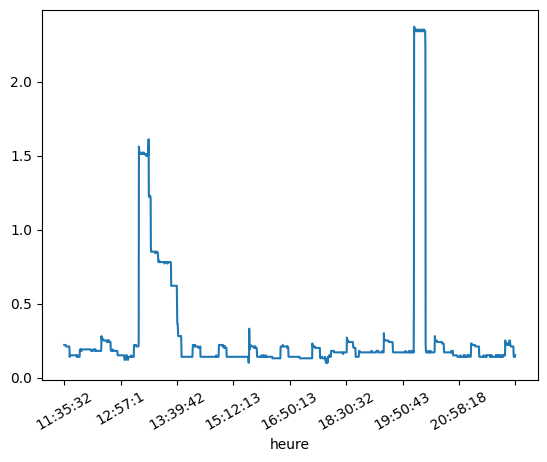

In [202]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [203]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:08.614109,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:30.472109,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:21:52.473109,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:14.401109,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:36.292109,21/08/23
...,...,...,...,...,...,...,...
1378125,24409,0.15,24.409,147.486583,32411297857,2024-08-30 22:29:04.537109,30/08/24
1378126,24210,0.15,24.210,148.698885,32411322067,2024-08-30 22:29:28.747109,30/08/24
1378127,25066,0.14,25.066,143.620841,32411347133,2024-08-30 22:29:53.813109,30/08/24
1378128,24721,0.14,24.721,145.625177,32411371854,2024-08-30 22:30:18.534109,30/08/24


In [204]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:2,27013,0.13,27.013,133.269167,32330355981,2024-08-30 00:00:02.661109,30/08/24
0:0:28,25621,0.14,25.621,140.509738,32330381602,2024-08-30 00:00:28.282109,30/08/24
0:0:53,24939,0.14,24.939,144.352219,32330406541,2024-08-30 00:00:53.221109,30/08/24
0:1:17,24727,0.14,24.727,145.589841,32330431268,2024-08-30 00:01:17.948109,30/08/24
0:1:43,25578,0.14,25.578,140.745954,32330456846,2024-08-30 00:01:43.526109,30/08/24
...,...,...,...,...,...,...,...
22:29:4,24409,0.15,24.409,147.486583,32411297857,2024-08-30 22:29:04.537109,30/08/24
22:29:28,24210,0.15,24.210,148.698885,32411322067,2024-08-30 22:29:28.747109,30/08/24
22:29:53,25066,0.14,25.066,143.620841,32411347133,2024-08-30 22:29:53.813109,30/08/24


In [205]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.381
Min : 02/08/24 3.034


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1374596,27013,0.13,27.013,133.269167,32330355981,2024-08-30 00:00:02.661109,30/08/24,0:0:2
1374597,25621,0.14,25.621,140.509738,32330381602,2024-08-30 00:00:28.282109,30/08/24,0:0:28
1374598,24939,0.14,24.939,144.352219,32330406541,2024-08-30 00:00:53.221109,30/08/24,0:0:53
1374599,24727,0.14,24.727,145.589841,32330431268,2024-08-30 00:01:17.948109,30/08/24,0:1:17
1374600,25578,0.14,25.578,140.745954,32330456846,2024-08-30 00:01:43.526109,30/08/24,0:1:43
...,...,...,...,...,...,...,...,...
1378125,24409,0.15,24.409,147.486583,32411297857,2024-08-30 22:29:04.537109,30/08/24,22:29:4
1378126,24210,0.15,24.210,148.698885,32411322067,2024-08-30 22:29:28.747109,30/08/24,22:29:28
1378127,25066,0.14,25.066,143.620841,32411347133,2024-08-30 22:29:53.813109,30/08/24,22:29:53
1378128,24721,0.14,24.721,145.625177,32411371854,2024-08-30 22:30:18.534109,30/08/24,22:30:18


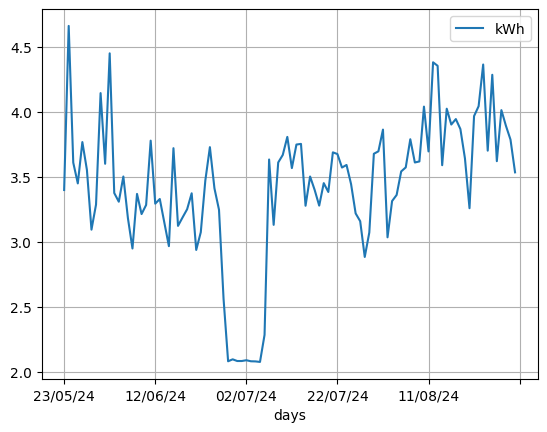

In [206]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-08-30 00:00:02.661109	2024-08-30 07:53:38.258109	7h 53m 35s 	1000
2024-08-30 07:53:38.258109	2024-08-30 13:36:26.745109	5h 42m 48s 	2000
2024-08-30 13:36:26.745109	2024-08-30 19:38:29.810109	6h 2m 3s 	3000
2024-08-30 19:38:29.810109	2024-08-30 22:30:42.815109	2h 52m 13s 	534
<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 1374596 to 1378129
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3534 non-null   int64         
 1   kWh        3534 non-null   float64       
 2   sec        3534 non-null   float64       
 3   Wh         3534 non-null   float64       
 4   cumul(ms)  3534 non-null   int64         
 5   dates      3534 non-null   datetime64[ns]
 6   days       3534 non-null   object        
 7   heure      3534 non-null   object        
 8   hours      3534 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 276.1+ KB


('30/08/24', <Axes: xlabel='hours'>)

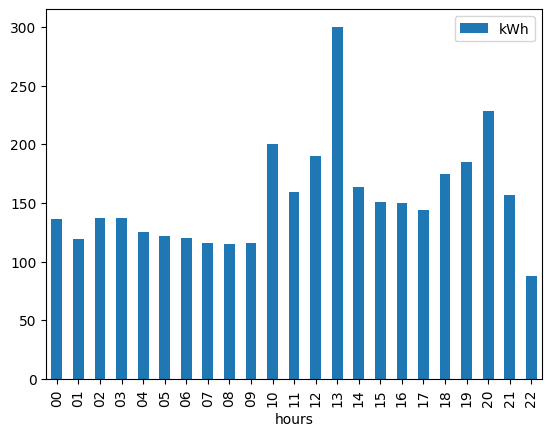

In [207]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [208]:
df_grp

,kWh
days,
21/08/23,0.805
22/08/23,3.700
23/08/23,4.222
24/08/23,3.683
25/08/23,4.181
...,...
26/08/24,3.620
27/08/24,4.013
28/08/24,3.892


In [209]:
# select number of days to display
span = 30
#df_grp.tail(span)


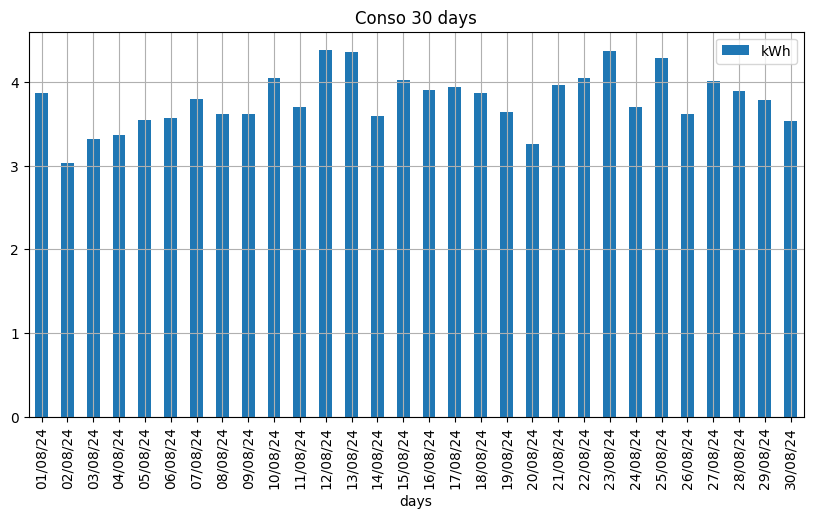

In [210]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


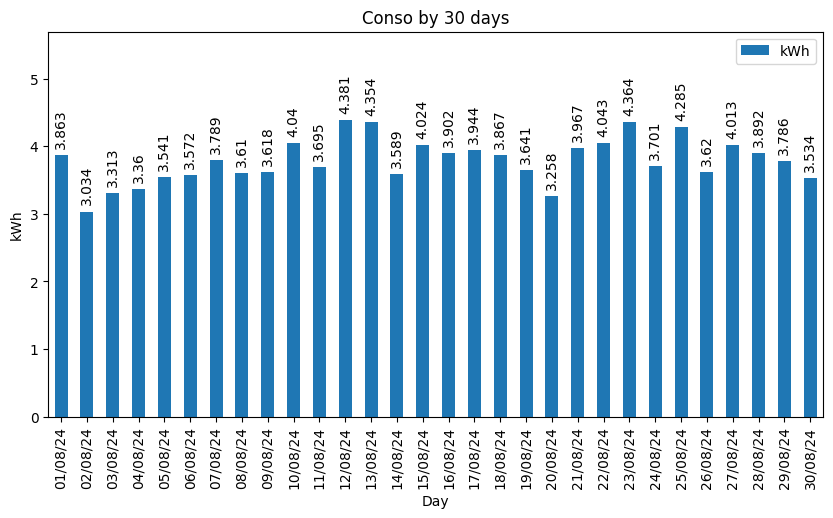

In [211]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [212]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
01/08/24    3.863
02/08/24    3.034
03/08/24    3.313
04/08/24    3.360
05/08/24    3.541
06/08/24    3.572
07/08/24    3.789
08/08/24    3.610
09/08/24    3.618
10/08/24    4.040
11/08/24    3.695
12/08/24    4.381
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.944
18/08/24    3.867
19/08/24    3.641
20/08/24    3.258
21/08/24    3.967
22/08/24    4.043
23/08/24    4.364
24/08/24    3.701
25/08/24    4.285
26/08/24    3.620
27/08/24    4.013
28/08/24    3.892
29/08/24    3.786
30/08/24    3.534
Name: kWh, dtype: float64

In [213]:
x_labels=df_grp.tail(span).index
x_labels

Index(['01/08/24', '02/08/24', '03/08/24', '04/08/24', '05/08/24', '06/08/24',
       '07/08/24', '08/08/24', '09/08/24', '10/08/24', '11/08/24', '12/08/24',
       '13/08/24', '14/08/24', '15/08/24', '16/08/24', '17/08/24', '18/08/24',
       '19/08/24', '20/08/24', '21/08/24', '22/08/24', '23/08/24', '24/08/24',
       '25/08/24', '26/08/24', '27/08/24', '28/08/24', '29/08/24', '30/08/24'],
      dtype='object', name='days')

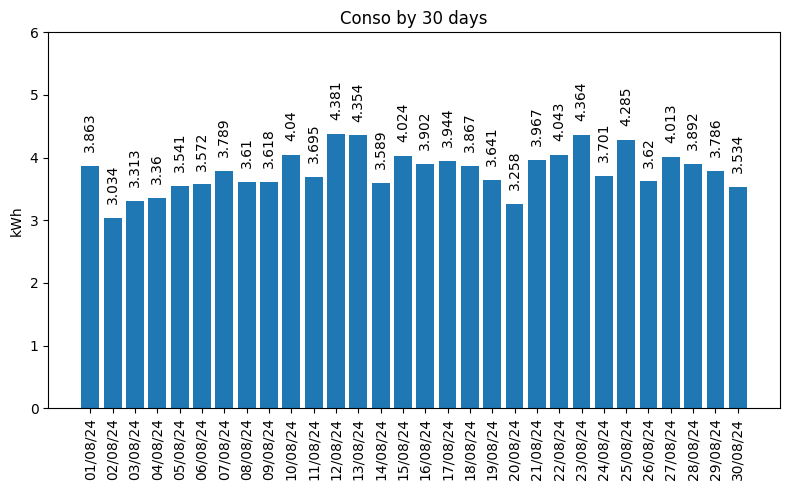

In [214]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [215]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

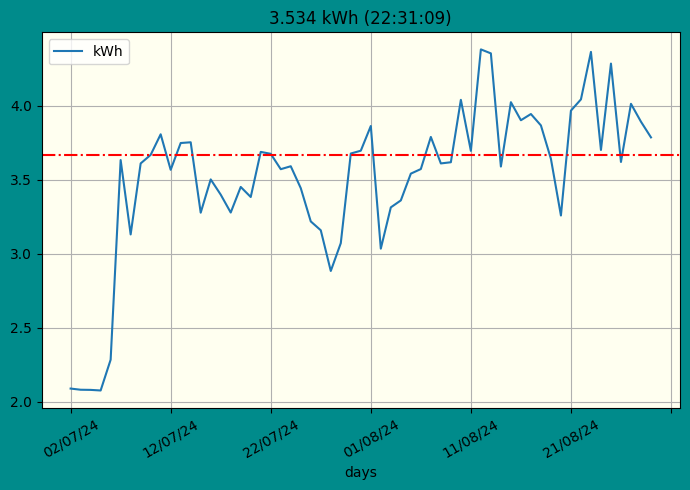

In [216]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

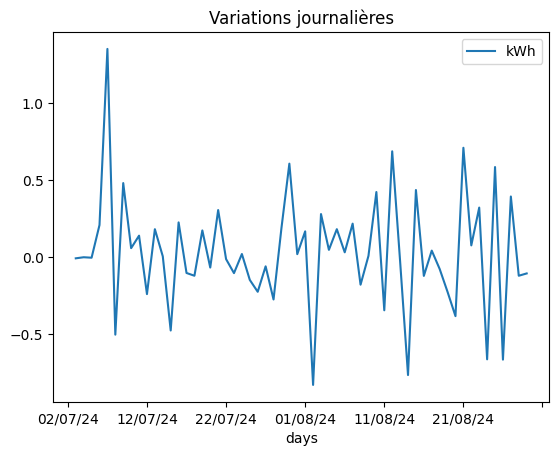

In [217]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [218]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:08.614109,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:30.472109,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:21:52.473109,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:14.401109,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:36.292109,21/08/23,19
...,...,...,...,...,...,...,...,...
1378125,24409,0.15,24.409,147.486583,32411297857,2024-08-30 22:29:04.537109,30/08/24,22
1378126,24210,0.15,24.210,148.698885,32411322067,2024-08-30 22:29:28.747109,30/08/24,22
1378127,25066,0.14,25.066,143.620841,32411347133,2024-08-30 22:29:53.813109,30/08/24,22
1378128,24721,0.14,24.721,145.625177,32411371854,2024-08-30 22:30:18.534109,30/08/24,22


In [219]:

# group all by day for all conso_days
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
groupallbyday.tail()


,days,hours,kWh
117,21/08/23,19,0.16
118,21/08/23,19,0.16
119,21/08/23,19,0.16
120,21/08/23,19,0.16
121,21/08/23,19,0.16
...,...,...,...
1378125,30/08/24,22,0.15
1378126,30/08/24,22,0.15
1378127,30/08/24,22,0.14
1378128,30/08/24,22,0.14


In [220]:
grp_by_day = groupallbyday.count()
grp_by_day

kWh
days     hours     
21/08/23 19     122
         20     280
         21     143
         22     130
         23     130
...             ...
30/08/24 18     175
         19     185
         20     228
         21     157
         22      88

[9004 rows x 1 columns]

In [221]:
grp_by_day['cumsum'] = grp_by_day.groupby(level=0)['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(level=0)['kWh'].diff()
# or
grp_by_day['cumsum'] = grp_by_day.groupby(['days'])['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(['days'])['kWh'].diff()
grp_by_day

kWh  cumsum   diff
days     hours                    
21/08/23 19     122     122    NaN
         20     280     402  158.0
         21     143     545 -137.0
         22     130     675  -13.0
         23     130     805    0.0
...             ...     ...    ...
30/08/24 18     175    2876   31.0
         19     185    3061   10.0
         20     228    3289   43.0
         21     157    3446  -71.0
         22      88    3534  -69.0

[9004 rows x 3 columns]

Text(0.5, 1.0, 'Cumul journalier')

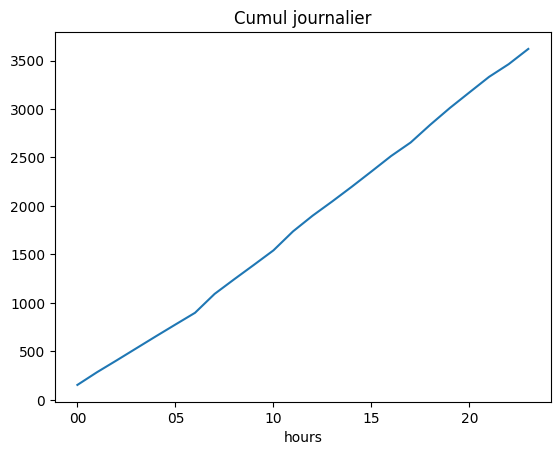

In [222]:
# progression sans surprise
grp_by_day.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

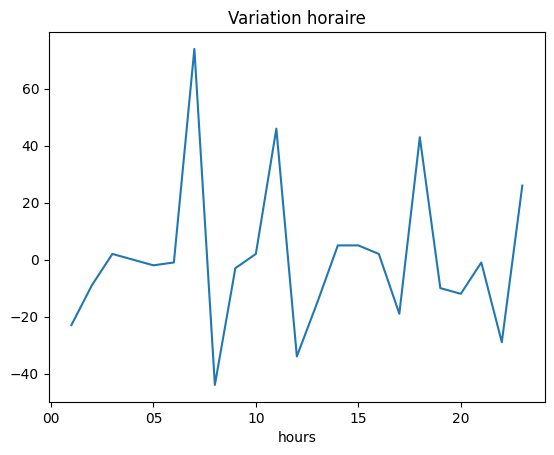

In [223]:
# plus parlant
grp_by_day.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [224]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_day.index.levels[0].unique())
# or
n = len(grp_by_day.index.levels[0])
# or
n = grp_by_day.index.levshape[0]  # levshape -> (371,24)
n

376

Text(0.5, 1.0, '376 days')

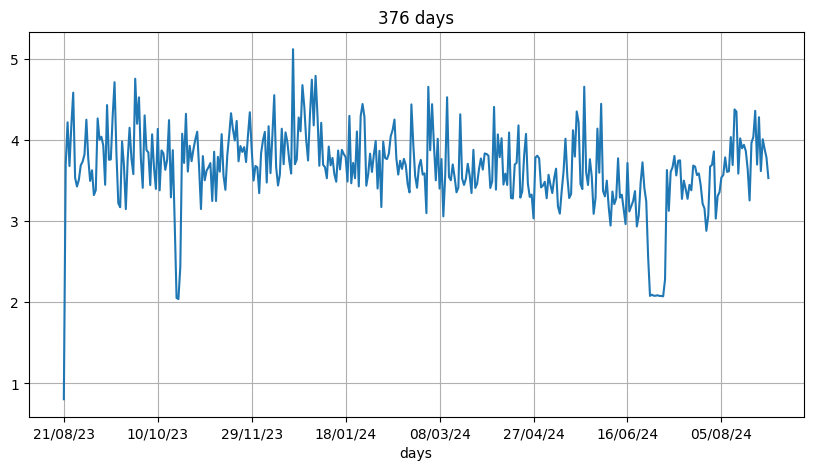

In [225]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '30/08/24')

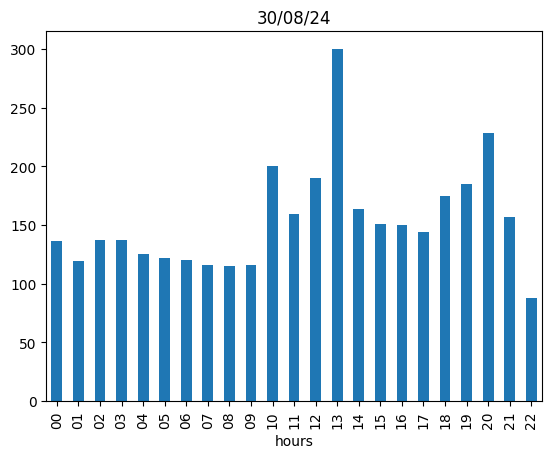

In [226]:
# select a day to plot
day = '02/07/24'
day = today
grp_by_day.loc[day]['kWh'].plot.bar()
plt.title(f'{day}')

# Conso du jour


In [227]:
groupedbyhour.count()

,kWh
hours,
00,136
01,119
02,137
03,137
04,125
05,122
06,120
07,116
08,115


In [228]:
day = '26/08/24'
day = today
grp_by_day.loc[day].kWh

hours
00    136
01    119
02    137
03    137
04    125
05    122
06    120
07    116
08    115
09    116
10    200
11    159
12    190
13    300
14    164
15    151
16    150
17    144
18    175
19    185
20    228
21    157
22     88
Name: kWh, dtype: int64

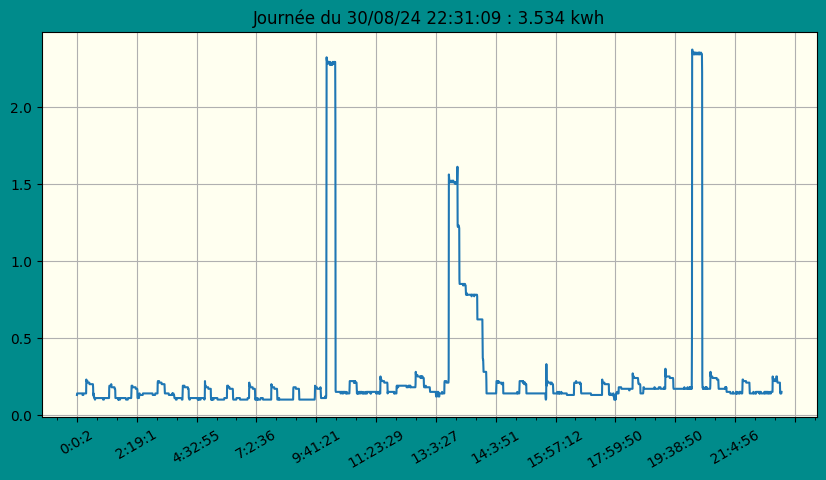

In [229]:

show(day,bgcolor='ivory')


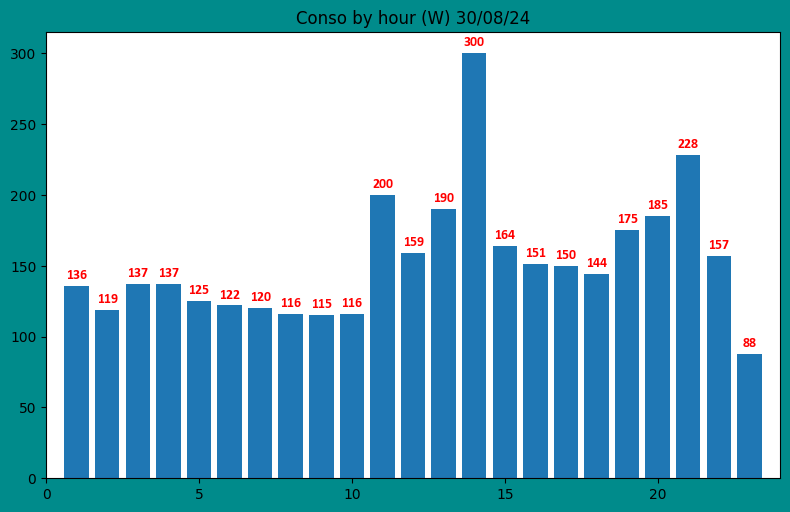

In [230]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_day.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


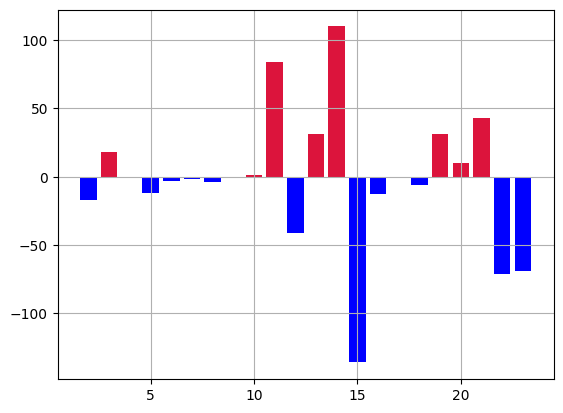

In [231]:
diff = grp_by_day.loc[day]
diff
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

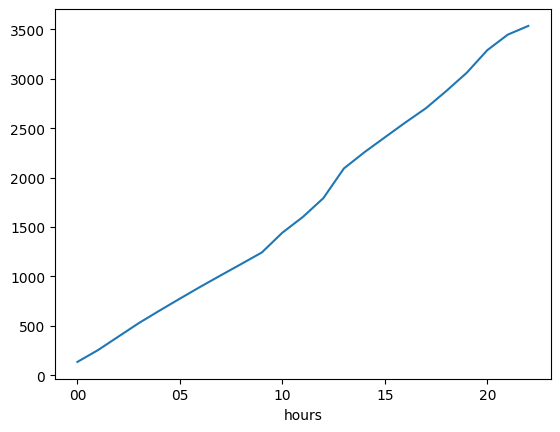

In [232]:
data.cumsum().plot()


<Axes: xlabel='hours'>

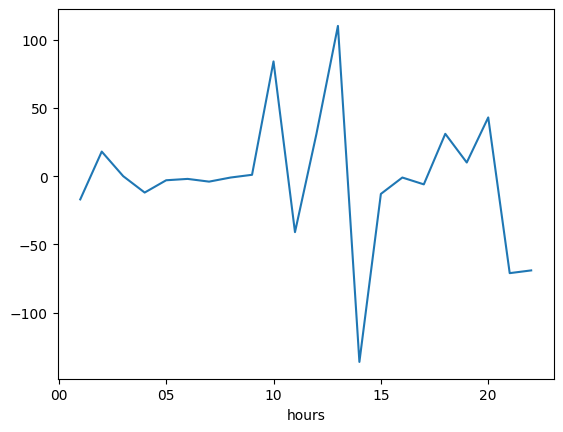

In [233]:
data.diff().plot()

# Test

In [234]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [235]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [236]:
#conso_byhour(day)

In [237]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

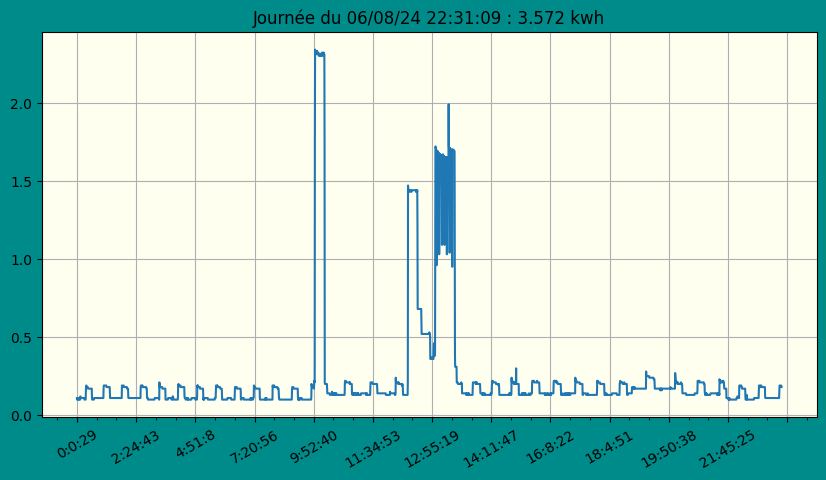

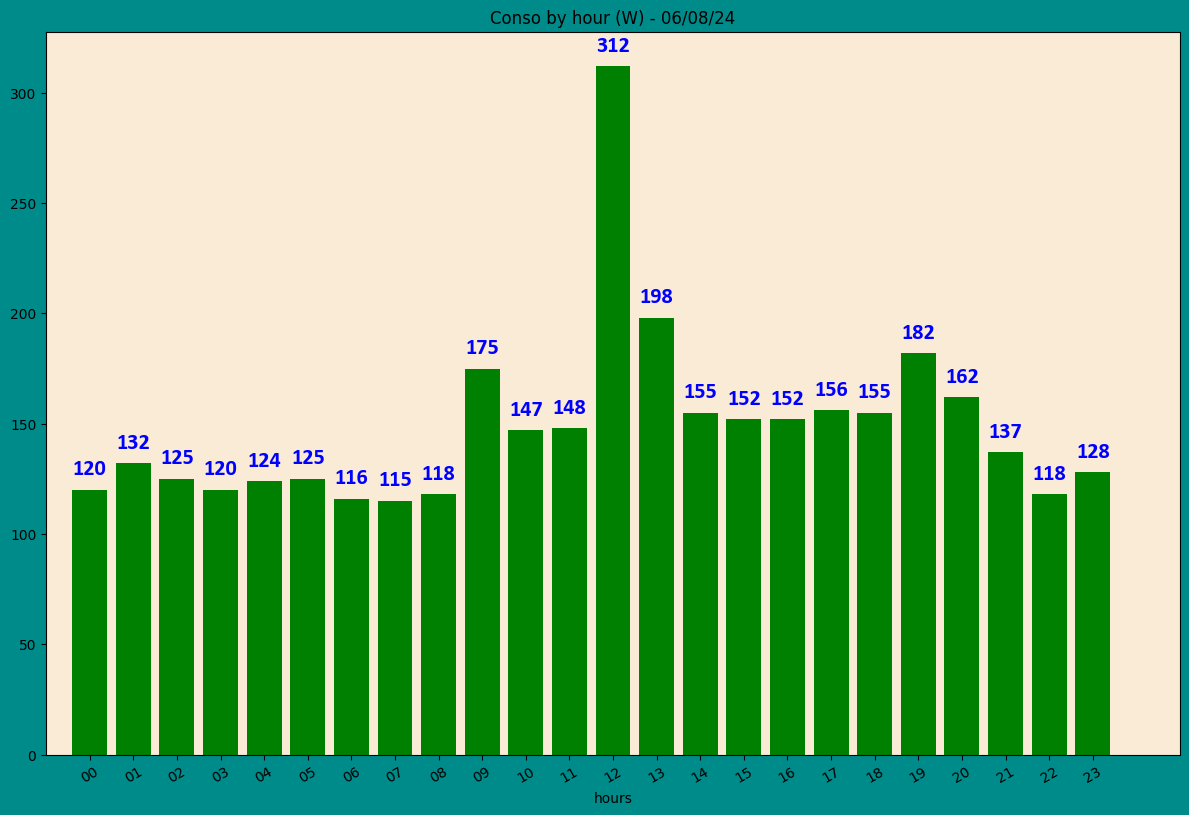

In [238]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

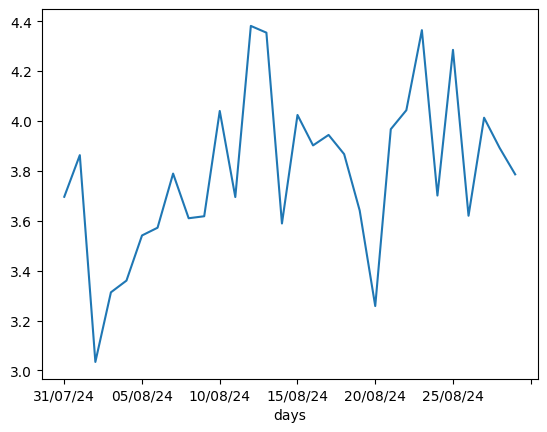

In [239]:
month.plot()


In [240]:
month

days
31/07/24    3.696
01/08/24    3.863
02/08/24    3.034
03/08/24    3.313
04/08/24    3.360
05/08/24    3.541
06/08/24    3.572
07/08/24    3.789
08/08/24    3.610
09/08/24    3.618
10/08/24    4.040
11/08/24    3.695
12/08/24    4.381
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.944
18/08/24    3.867
19/08/24    3.641
20/08/24    3.258
21/08/24    3.967
22/08/24    4.043
23/08/24    4.364
24/08/24    3.701
25/08/24    4.285
26/08/24    3.620
27/08/24    4.013
28/08/24    3.892
29/08/24    3.786
Name: kWh, dtype: float64

In [241]:
month

days
31/07/24    3.696
01/08/24    3.863
02/08/24    3.034
03/08/24    3.313
04/08/24    3.360
05/08/24    3.541
06/08/24    3.572
07/08/24    3.789
08/08/24    3.610
09/08/24    3.618
10/08/24    4.040
11/08/24    3.695
12/08/24    4.381
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.944
18/08/24    3.867
19/08/24    3.641
20/08/24    3.258
21/08/24    3.967
22/08/24    4.043
23/08/24    4.364
24/08/24    3.701
25/08/24    4.285
26/08/24    3.620
27/08/24    4.013
28/08/24    3.892
29/08/24    3.786
Name: kWh, dtype: float64

In [242]:
# date with max conso in 1 month
month.idxmax()

'12/08/24'

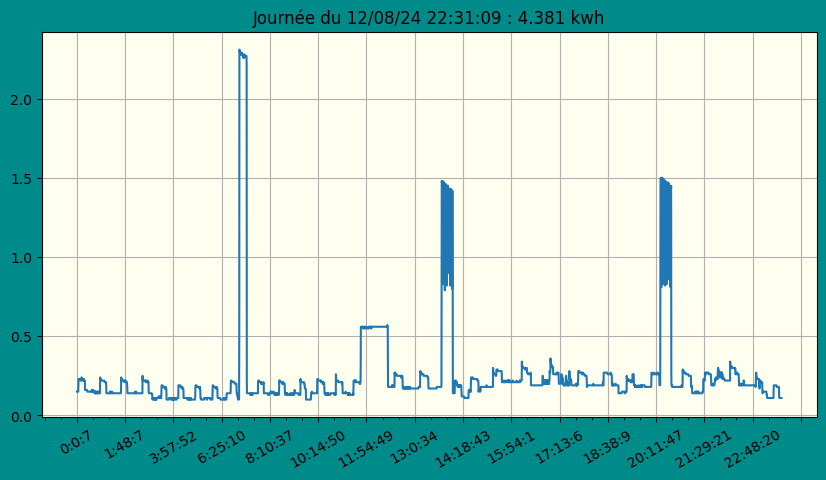

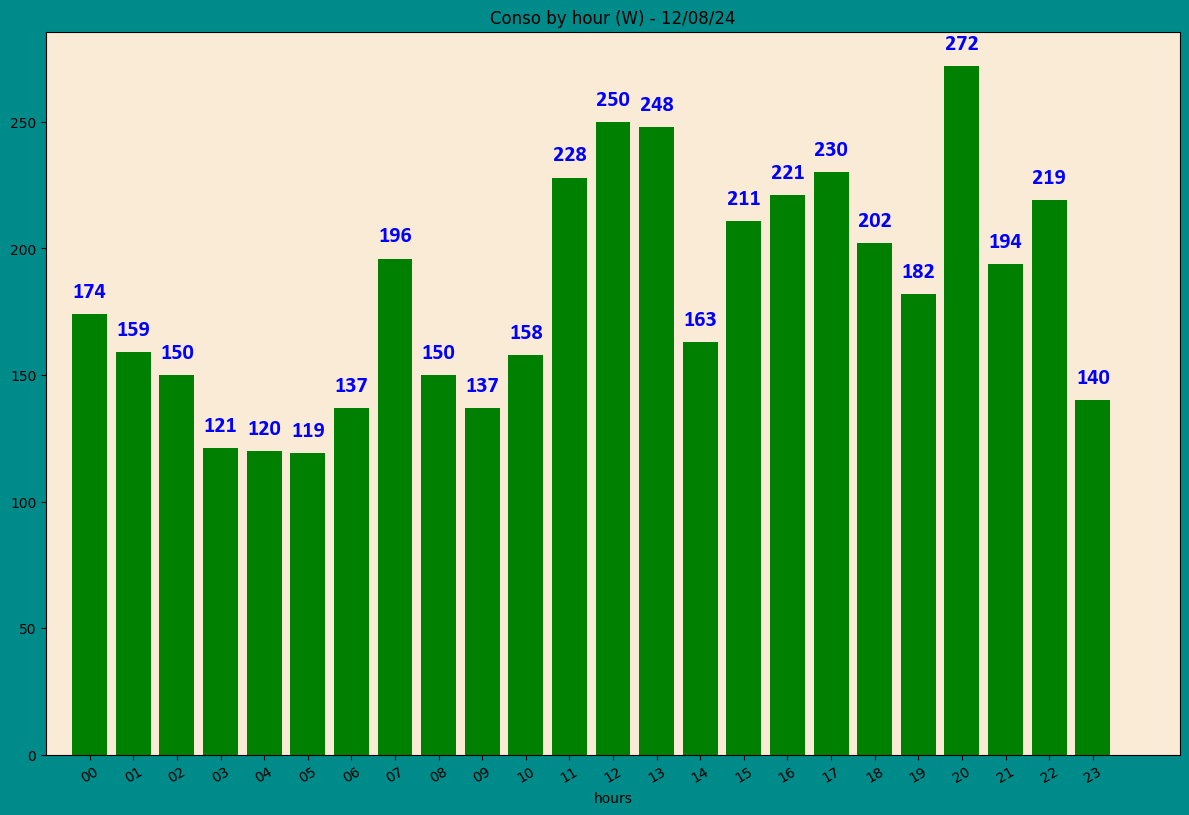

In [243]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [244]:
grp_by_day.loc[month.idxmax()].tail(7)

,kWh,cumsum,diff
hours,,,
17,230,3172,9.0
18,202,3374,-28.0
19,182,3556,-20.0
20,272,3828,90.0
21,194,4022,-78.0
22,219,4241,25.0
23,140,4381,-79.0


In [245]:
grp_by_day.columns

Index(['kWh', 'cumsum', 'diff'], dtype='object')

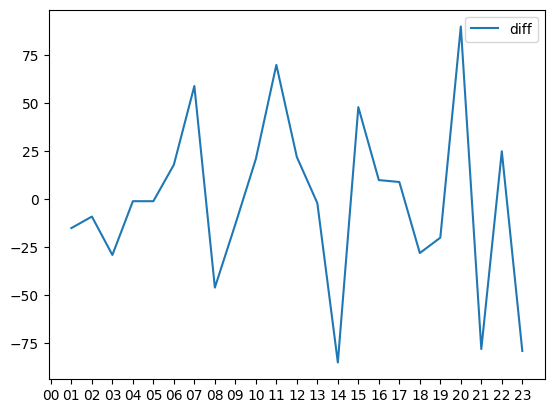

In [246]:
plt.plot(grp_by_day.loc[month.idxmax()]['diff'],label=grp_by_day.columns[2])
plt.legend()

In [247]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)